# Tarea 3

**Autor:** Alejandro Zarate Macias  
**Curso:** Métodos Matemáticos para Análisis de Datos  
**Fecha:** 08 de Septiembre 2025

---

## Introducción

En este notebook se abordan los problemas 3, 6, 7, 8 y 9 de la Tarea 3, relacionados con la optimizacion de multiples funciones y encontrar sus valores minimos o donde la funcion tiende a 0 utilizando el algoritmo de Steepest Descent y diferentes schedulers de learning rate.
El objetivo principal es desarrollar códigos que permitan calcular, analizar y visualizar los resultados de estas optimizaciones.

---

# Problema 3

Escriba un script en Python para generar una matriz simétrica aleatoria $A \in (-0.5, 0.5)^{10 \times 10}$. Use la idea del Problema 2 para encontrar un valor adecuado de $\alpha$ y construir $B$ tal que $B > 0$. Explique por qué la ``estructura interna'' de ambas matrices $A$ y $B$ permanece igual al inspeccionar su espectro.


## Métodos

In [16]:
import numpy as np

# Dimensión de la matriz
n = 10

# Generar matriz aleatoria en (-0.5, 0.5)
A = np.random.uniform(-0.5, 0.5, (n, n))

# Hacerla simétrica
A = (A + A.T) / 2

# Calcular autovalores de A
eigvals_A = np.linalg.eigvalsh(A)

# Encontrar el menor autovalor
lambda_min = np.min(eigvals_A)

# Escoger alpha suficientemente grande
alpha = abs(lambda_min) + 1e-3

# Construir B
B = A + alpha * np.eye(n)

# Verificar positividad
eigvals_B = np.linalg.eigvalsh(B)

## Resultados

In [17]:
print("Matriz A:\n", A)

Matriz A:
 [[-0.1597015   0.32614997  0.44864424  0.16383001 -0.01446576 -0.28638421
   0.09322709  0.39829362 -0.17000472 -0.20829557]
 [ 0.32614997  0.31178474  0.30302445 -0.30084096  0.06873596 -0.10350917
   0.18465341  0.02358619  0.01431872 -0.01940603]
 [ 0.44864424  0.30302445 -0.37841589 -0.27583358  0.42444271 -0.4155837
  -0.25659094 -0.20438009 -0.00445253 -0.05595198]
 [ 0.16383001 -0.30084096 -0.27583358 -0.30807657 -0.13332038  0.07188835
  -0.11538396  0.1904204   0.05955562 -0.02583109]
 [-0.01446576  0.06873596  0.42444271 -0.13332038 -0.0517211  -0.02152996
  -0.13744347  0.16865965  0.10829376  0.0041956 ]
 [-0.28638421 -0.10350917 -0.4155837   0.07188835 -0.02152996  0.36899496
   0.11347805  0.07966904  0.20012272  0.23010088]
 [ 0.09322709  0.18465341 -0.25659094 -0.11538396 -0.13744347  0.11347805
  -0.44174235 -0.26817804 -0.2879604   0.37259374]
 [ 0.39829362  0.02358619 -0.20438009  0.1904204   0.16865965  0.07966904
  -0.26817804 -0.38417314 -0.36068011  0.

In [18]:
print("Autovalores de A:", eigvals_A)

Autovalores de A: [-1.44998931 -0.85293174 -0.62162212 -0.46334469 -0.39179013 -0.04738631
  0.21166067  0.41425847  0.44399348  1.16480152]


In [19]:
print("Matriz B (A + alpha*I):\n", B)

Matriz B (A + alpha*I):
 [[ 1.2912878   0.32614997  0.44864424  0.16383001 -0.01446576 -0.28638421
   0.09322709  0.39829362 -0.17000472 -0.20829557]
 [ 0.32614997  1.76277405  0.30302445 -0.30084096  0.06873596 -0.10350917
   0.18465341  0.02358619  0.01431872 -0.01940603]
 [ 0.44864424  0.30302445  1.07257342 -0.27583358  0.42444271 -0.4155837
  -0.25659094 -0.20438009 -0.00445253 -0.05595198]
 [ 0.16383001 -0.30084096 -0.27583358  1.14291273 -0.13332038  0.07188835
  -0.11538396  0.1904204   0.05955562 -0.02583109]
 [-0.01446576  0.06873596  0.42444271 -0.13332038  1.3992682  -0.02152996
  -0.13744347  0.16865965  0.10829376  0.0041956 ]
 [-0.28638421 -0.10350917 -0.4155837   0.07188835 -0.02152996  1.81998427
   0.11347805  0.07966904  0.20012272  0.23010088]
 [ 0.09322709  0.18465341 -0.25659094 -0.11538396 -0.13744347  0.11347805
   1.00924695 -0.26817804 -0.2879604   0.37259374]
 [ 0.39829362  0.02358619 -0.20438009  0.1904204   0.16865965  0.07966904
  -0.26817804  1.06681617 -

In [20]:
print("Autovalores de B:", eigvals_B)

Autovalores de B: [1.00000000e-03 5.98057570e-01 8.29367182e-01 9.87644614e-01
 1.05919917e+00 1.40360300e+00 1.66264997e+00 1.86524778e+00
 1.89498278e+00 2.61579083e+00]


In [21]:
print("¿B es definida positiva?:", np.all(eigvals_B > 0))

¿B es definida positiva?: True


# Problema 6

Implemente en Python el algoritmo de descenso más pronunciado (SD) para las funciones $ (1)-(3) $. Use un paso de longitud fija y el gradiente analítico. Muestre gráficas del número de iteraciones contra el valor de la función.


## Métodos


In [22]:
import numpy as np                  # Para operaciones vectoriales y matriciales
import matplotlib.pyplot as plt     # Para visualización de datos
from typing import Callable         # Para anotaciones de tipos

In [23]:
class SteepestDescent:
    """
    Algoritmo de Descenso Más Pronunciado (Steepest Descent) con gradiente analítico.
    """
    def __init__(self): ...
    
    def optimize(self, 
                 func: Callable, 
                 grad_func: Callable, 
                 x0: np.ndarray, 
                 lr: float = 0.01,
                 max_iterations: int = 1000,
                 stop_value: float = None):
        '''Optimiza una función utilizando el algoritmo de descenso más pronunciado.
        Args:
            func: Función objetivo a minimizar.
            grad_func: Función que calcula el gradiente de la función objetivo.
            x0: Punto inicial (array).
            lr: Tamaño de paso (opcional).
            max_iterations: Número máximo de iteraciones (opcional).
            stop_value: Valor de parada (opcional).

        Returns:
            x: Punto óptimo encontrado.
            trayectory: Lista con los valores de la función en cada iteración.
        '''
        x = np.array(x0, dtype=float)
        trayectory = []
        for _ in range(max_iterations):
            f_val = func(x)
            trayectory.append(f_val)
            if stop_value and f_val <= stop_value:
                break
            grad = grad_func(x)
            x = x - lr * grad
        return x, trayectory
    
    def plot(self, trayectory, title="Descenso Más Pronunciado"):
        ''' 
        Plotea la trayectoria de la función a lo largo de las iteraciones.
        Args:
            trayectory: Lista con los valores de la función en cada iteración.
            title: Título del gráfico (opcional).

        Returns:
            None, muestra el gráfico.
        '''
        plt.figure(figsize=(8, 6))
        plt.plot(trayectory)
        plt.title(title)
        plt.xlabel('Iteraciones')
        plt.ylabel('Valor de la función')
        plt.grid(True)
        plt.show()

In [24]:
#Funciones Objetivo y sus Gradientes

## Funcion de Esfera Trasladada
def translated_sphere(x):
    c = np.ones(len(x))
    return np.sum((x - c)**2)

def gradient_translated_sphere(x):
    c = np.ones(len(x))
    return 2 * (x - c)

## Funcion de Rosenbrock
def rosenbrock(x):
    result = 0
    for i in range(len(x) - 1):
        result += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return result

def gradient_rosenbrock(x):
    grad = np.zeros(len(x))
    for i in range(len(x) - 1):
        grad[i] += -400 * x[i] * (x[i+1] - x[i]**2) - 2 * (1 - x[i])
        grad[i+1] += 200 * (x[i+1] - x[i]**2)
    return grad

## Funcion Perm
def perm(x):
    B = 1
    result = 0
    for k in range(1, len(x) + 1):
        inner_sum = 0
        for i in range(1, len(x) + 1):
            inner_sum += (i + B) * (x[i-1]**k - (1/i)**k)
        result += inner_sum**2
    return result

def gradient_perm(x):
    B = 1
    grad = np.zeros(len(x))
    for j in range(len(x)):
        for k in range(1, len(x) + 1):
            inner_sum = 0
            for i in range(1, len(x) + 1):
                inner_sum += (i + B) * (x[i-1]**k - (1/i)**k)
            grad[j] += 2 * inner_sum * (j + 1 + B) * k * x[j]**(k-1)
    return grad   

## Resultados

In [25]:
# Valores de prueba iniciales para las funciones
# x0 = [0.5, 0.5, 0.5, 0.5, 0.5]
n = 5
x0 = [0.5]*n

#Inicializar el algoritmo
sd_algorithm = SteepestDescent()

FUNCIÓN ESFERA TRASLADADA
Valor óptimo encontrado: [0.95573106 0.95573106 0.95573106 0.95573106 0.95573106]
Valor de la función en el óptimo: 0.009798693633547332
Número de iteraciones: 121
Gráfica Descenso de la función:


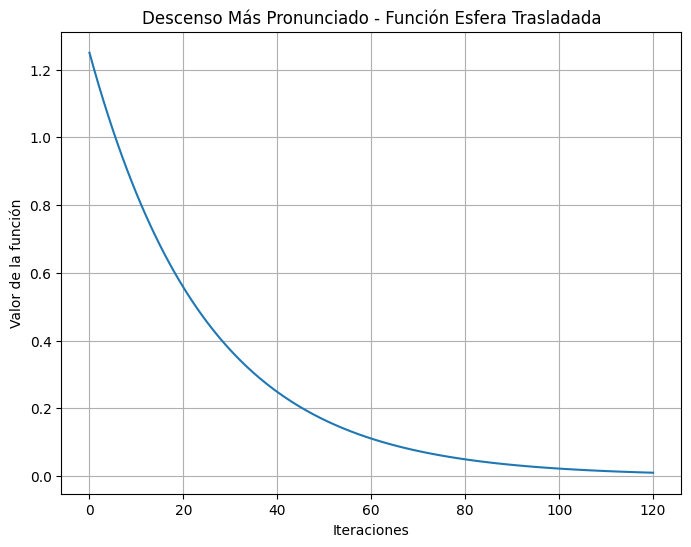

In [26]:
# Prueba con la función Esfera Trasladada

x_sphere, trayectory_sphere = sd_algorithm.optimize(
    func=translated_sphere,
    grad_func=gradient_translated_sphere,
    x0=x0,
    lr=0.01,
    max_iterations=1000,
    stop_value=1e-2
)
print("="*60)
print("FUNCIÓN ESFERA TRASLADADA")
print("="*60)
print("Valor óptimo encontrado:", x_sphere)
print("Valor de la función en el óptimo:", translated_sphere(x_sphere))
print("Número de iteraciones:", len(trayectory_sphere))
print("Gráfica Descenso de la función:")
sd_algorithm.plot(trayectory=trayectory_sphere, title="Descenso Más Pronunciado - Función Esfera Trasladada")

FUNCIÓN ROSENBROCK
Valor óptimo encontrado: [0.96540522 0.93190533 0.8681822  0.75313828 0.56580045]
Valor de la función en el óptimo: 0.08439538903733448
Número de iteraciones: 1000
Gráfica Descenso de la función:


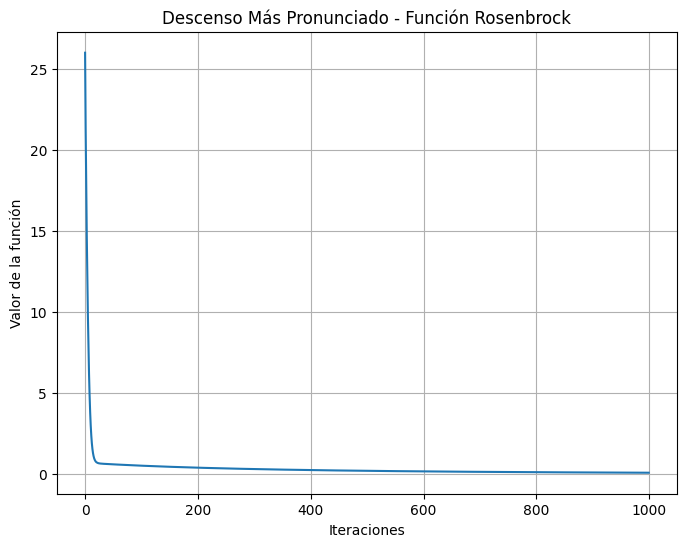

In [27]:
# Prueba con la función Rosenbrock

x_rosenbrock, trayectory_rosenbrock = sd_algorithm.optimize(
    func=rosenbrock,
    grad_func=gradient_rosenbrock,
    x0=x0,
    lr=0.001,
    max_iterations=1000,
    stop_value=1e-2
)
print("="*60)
print("FUNCIÓN ROSENBROCK")
print("="*60)
print("Valor óptimo encontrado:", x_rosenbrock)
print("Valor de la función en el óptimo:", rosenbrock(x_rosenbrock))
print("Número de iteraciones:", len(trayectory_rosenbrock))
print("Gráfica Descenso de la función:")
sd_algorithm.plot(trayectory=trayectory_rosenbrock, title="Descenso Más Pronunciado - Función Rosenbrock")

FUNCIÓN PERM
Valor óptimo encontrado: [0.37373352 0.92394664 0.28423641 0.23925204 0.23396527]
Valor de la función en el óptimo: 0.009998061364177057
Número de iteraciones: 935
Gráfica Descenso de la función:


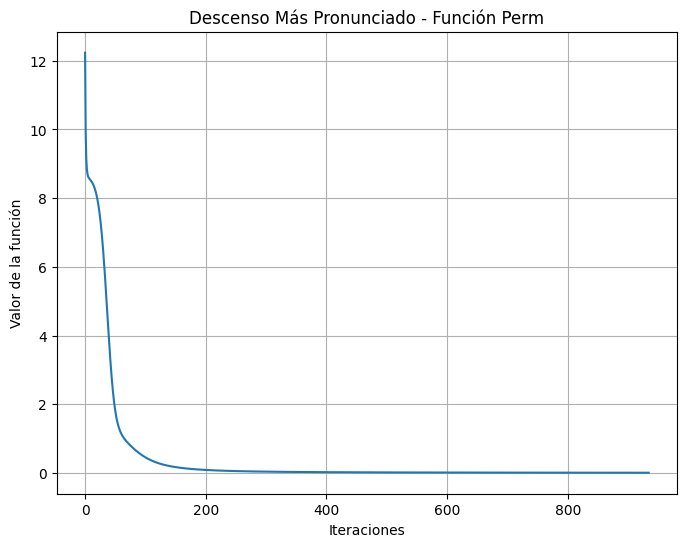

In [28]:
# Prueba con la función Perm

x_perm, trayectory_perm = sd_algorithm.optimize(
    func=perm,
    grad_func=gradient_perm,
    x0=x0,
    lr=0.001,
    max_iterations=1000,
    stop_value=1e-2
)
print("="*60)
print("FUNCIÓN PERM")
print("="*60)
print("Valor óptimo encontrado:", x_perm)
print("Valor de la función en el óptimo:", perm(x_perm))
print("Número de iteraciones:", len(trayectory_perm))
print("Gráfica Descenso de la función:")
sd_algorithm.plot(trayectory=trayectory_perm, title="Descenso Más Pronunciado - Función Perm")

# Problema 7

Mejore su script anterior usando un gradiente numérico en lugar del gradiente analítico. A continuación, resuelva el problema de minimización para las funciones (1)-(3) usando el mismo número de iteraciones que antes. Realice una comparación de las soluciones obtenidas con las del Problema 6.

## Métodos

In [29]:
import numpy as np                   # Para operaciones vectoriales y matriciales
import matplotlib.pyplot as plt      # Para graficar resultados
from typing import Callable          # Para anotaciones de tipos

In [30]:
class SteepestDescentNumerical:
    '''Optimización por el método del descenso más pronunciado.'''
    def __init__(self): ...
    
    def optimize(self, 
                 func: Callable[[np.ndarray], float],  
                 x0: np.ndarray, 
                 lr: float = 0.01,
                 h: float = 1e-5,
                 max_iterations: int = 1000,
                 stop_value: float = None):
        ''' 
        Optimización por el método del descenso más pronunciado.

        Args:
            func: Función objetivo a minimizar.
            x0: Punto inicial (array).
            lr: Tamaño de paso (opcional).
            h: Paso para la aproximación numérica del gradiente (opcional).
            max_iterations: Número máximo de iteraciones (opcional).
            stop_value: Valor de parada (opcional).

        Returns:
            x: Punto óptimo encontrado.
            trayectory: Lista con los valores de la función en cada iteración.
        '''
        
        x = np.array(x0, dtype=float)
        trayectory = []
        
        for _ in range(max_iterations):
            f_val = func(x)
            trayectory.append(f_val)

            if stop_value and f_val <= stop_value:
                    break

            grad = self.numerical_gradient(func, x, h=h)

            x = x - lr * grad
            
        return x, trayectory
    
    def numerical_gradient(self, f, x, h):
        '''
        Calcula el gradiente de f en x usando diferencias finitas centrales.

        Args:
            f: Función objetivo.
            x: Punto donde se evalúa el gradiente.
            h: Paso para la aproximación numérica.

        Returns:
            grad: Gradiente aproximado en el punto x.
        '''
        n = len(x)
        grad = np.zeros(n)
        
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            
            x_plus[i] += h
            x_minus[i] -= h

            grad[i] = (f(x_plus) - f(x_minus)) / (2*h)

        return grad
    
    def plot(self, trayectory, title="Descenso Más Pronunciado"):
        ''' 
        Plotea la trayectoria de la función a lo largo de las iteraciones.
        Args:
            trayectory: Lista con los valores de la función en cada iteración.
            title: Título del gráfico (opcional).

        Returns:
            None, muestra el gráfico.
        '''
        plt.figure(figsize=(8, 6))
        plt.plot(trayectory)
        plt.title(title)
        plt.xlabel('Iteraciones')
        plt.ylabel('Valor de la función')
        plt.grid(True)
        plt.show()

In [31]:
# Funciones Objetivo

## Funcion de Esfera Trasladada
def translated_sphere(x):
    c = np.ones(len(x))
    return np.sum((x - c)**2)

## Funcion de Rosenbrock
def rosenbrock(x):
    result = 0
    for i in range(len(x) - 1):
        result += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return result

## Funcion Perm
def perm(x):
    B = 1
    result = 0
    for k in range(1, len(x) + 1):
        inner_sum = 0
        for i in range(1, len(x) + 1):
            inner_sum += (i + B) * (x[i-1]**k - (1/i)**k)
        result += inner_sum**2
    return result  

## Resultados

In [32]:
# Valores de prueba iniciales para las funciones
# x0 = [0.5, 0.5, 0.5, 0.5, 0.5]
n = 5
x0 = [0.5] * n

#Inicializar el algoritmo
sd_algorithm = SteepestDescentNumerical()

FUNCIÓN ESFERA TRASLADADA
Valor óptimo encontrado: [0.95573106 0.95573106 0.95573106 0.95573106 0.95573106]
Valor de la función en el óptimo: 0.00979869363375923
Número de iteraciones: 121
Gráfica Descenso de la función:


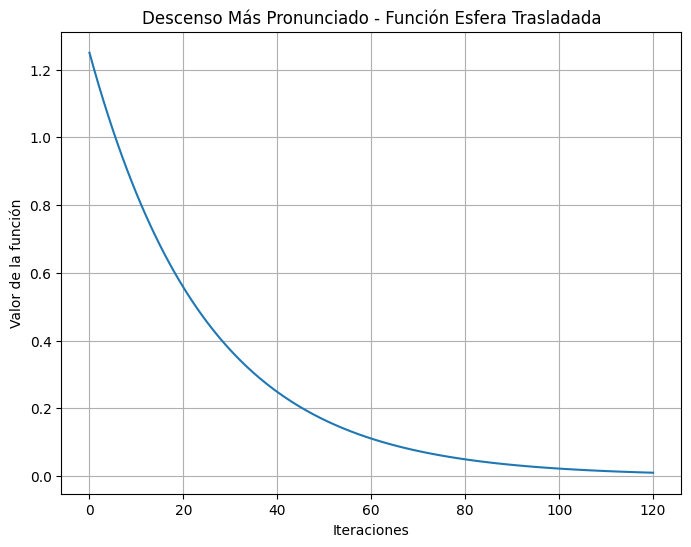

In [33]:
# Prueba con la función Esfera Trasladada

x_sphere, trayectory_sphere = sd_algorithm.optimize(
    func=translated_sphere,
    x0=x0,
    lr=0.01,
    h=1e-5,
    max_iterations=1000,
    stop_value=1e-2
)
print("="*60)
print("FUNCIÓN ESFERA TRASLADADA")
print("="*60)
print("Valor óptimo encontrado:", x_sphere)
print("Valor de la función en el óptimo:", translated_sphere(x_sphere))
print("Número de iteraciones:", len(trayectory_sphere))
print("Gráfica Descenso de la función:")
sd_algorithm.plot(trayectory=trayectory_sphere, title="Descenso Más Pronunciado - Función Esfera Trasladada")

FUNCIÓN ROSENBROCK
Valor óptimo encontrado: [0.96540522 0.93190533 0.86818219 0.75313827 0.56580043]
Valor de la función en el óptimo: 0.0843953967473511
Número de iteraciones: 1000
Gráfica Descenso de la función:


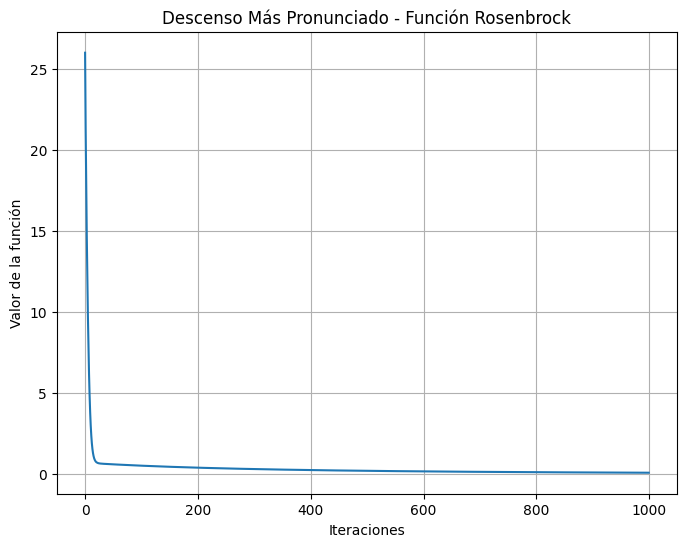

In [34]:
# Prueba con la función Rosenbrock

x_rosenbrock, trayectory_rosenbrock = sd_algorithm.optimize(
    func=rosenbrock,
    x0=x0,
    lr=0.001,
    h=1e-5,
    max_iterations=1000,
    stop_value=1e-2
)
print("="*60)
print("FUNCIÓN ROSENBROCK")
print("="*60)
print("Valor óptimo encontrado:", x_rosenbrock)
print("Valor de la función en el óptimo:", rosenbrock(x_rosenbrock))
print("Número de iteraciones:", len(trayectory_rosenbrock))
print("Gráfica Descenso de la función:")
sd_algorithm.plot(trayectory=trayectory_rosenbrock, title="Descenso Más Pronunciado - Función Rosenbrock")

FUNCIÓN PERM
Valor óptimo encontrado: [0.37373353 0.92394664 0.28423641 0.23925204 0.23396527]
Valor de la función en el óptimo: 0.009998061571719667
Número de iteraciones: 935
Gráfica Descenso de la función:


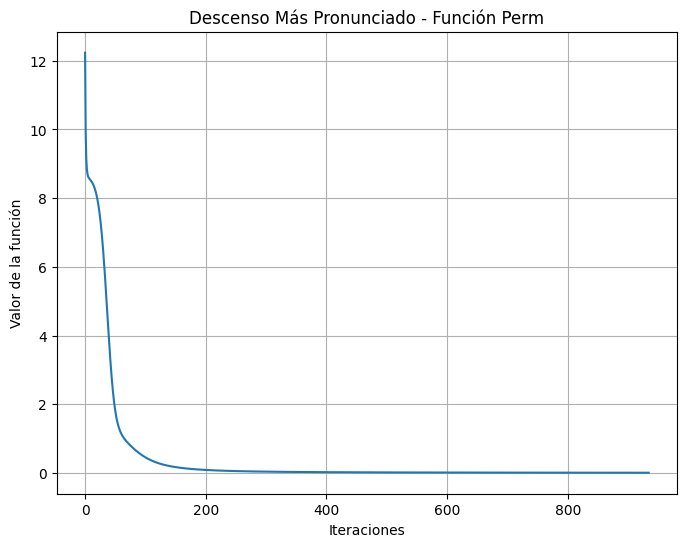

In [35]:
# Prueba con la función Perm
x_perm, trayectory_perm = sd_algorithm.optimize(
    func=perm,
    x0=x0,
    lr=0.001,
    h=1e-5,
    max_iterations=1000,
    stop_value=1e-2
)
print("="*60)
print("FUNCIÓN PERM")
print("="*60)
print("Valor óptimo encontrado:", x_perm)
print("Valor de la función en el óptimo:", perm(x_perm))
print("Número de iteraciones:", len(trayectory_perm))
print("Gráfica Descenso de la función:")
sd_algorithm.plot(trayectory=trayectory_perm, title="Descenso Más Pronunciado - Función Perm")

# Problema 8

Mejore aún más su script añadiendo longitudes de paso de tipo decreciente lineal, adaptativa e inteligente (i.e.\ condiciones de Armijo o de Wolfe). Puede usar un gradiente analítico o numérico. Use algunas gráficas para comparar los resultados obtenidos con cada una de las cuatro estrategias de longitud de paso.

## Métodos

In [ ]:
import numpy as np                  # Para operaciones vectoriales y matriciales
import matplotlib.pyplot as plt     # Para visualización de datos
from typing import Callable         # Para anotaciones de tipos

In [ ]:
class SteepestDescentNumericalLr:
    '''
    Algoritmo de Descenso Más Pronunciado (Steepest Descent) con gradiente numérico 
    y estrategias de tasa de aprendizaje.
    '''
    def __init__(self): ...
    
    def optimize(self, 
                 func: Callable,  
                 x0: np.ndarray, 
                 lr: float = 0.01,
                 h: float = 1e-5,
                 max_iterations: int = 1000,
                 stop_value: float = None,
                 lr_schedule_type: str = 'fixed'):
        '''Optimiza una función utilizando el algoritmo de descenso más pronunciado 
        con diferentes estrategias de tasa de aprendizaje.

        Args:
            func: Función objetivo a minimizar.
            x0: Punto inicial (array).
            lr: Tamaño de paso inicial (opcional).
            h: Paso para la aproximación numérica del gradiente (opcional).
            max_iterations: Número máximo de iteraciones (opcional).
            stop_value: Valor de parada (opcional).
            lr_schedule_type: Tipo de estrategia de tasa de aprendizaje 
                                ('fixed', 'linear_decreasing', 'adaptive', 'intelligent').

        Returns:
            x: Punto óptimo encontrado.
            trayectory: Lista con los valores de la función en cada iteración.
            lr_history: Lista con la tasa de aprendizaje en cada iteración.
        '''
        x = np.array(x0, dtype=float)
        trayectory = []
        lr_history = []
        initial_lr = lr
        lr_history.append(initial_lr)
        
        for i in range(max_iterations):
            f_val = func(x)
            trayectory.append(f_val)

            if stop_value and f_val <= stop_value:
                    break

            grad = self.numerical_gradient(func, x, h=h)

            lr = self.get_learning_rate(
                schedule_type=lr_schedule_type,
                initial_lr=initial_lr,
                iteration=i,
                max_iterations=max_iterations,
                func=func,
                x=x,
                grad=grad
            )
            lr_history.append(lr)

            x = x - lr * grad

        return x, trayectory, lr_history

    def numerical_gradient(self, f, x, h):
        '''
        Calcula el gradiente de f en x usando diferencias finitas centrales.

        Args:
            f: Función objetivo.
            x: Punto en el que se calcula el gradiente.
            h: Paso para la aproximación numérica del gradiente.

        Returns:
            grad: Gradiente aproximado en el punto x.
        '''
        n = len(x)
        grad = np.zeros(n)
        
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            
            x_plus[i] += h
            x_minus[i] -= h

            grad[i] = (f(x_plus) - f(x_minus)) / (2*h)

        return grad
    
    def get_learning_rate(self, schedule_type, initial_lr, iteration, max_iterations, func, x, grad):
        '''
        Obtiene la tasa de aprendizaje según la estrategia especificada.

        Args:
            schedule_type: Tipo de estrategia de tasa de aprendizaje.
            initial_lr: Tasa de aprendizaje inicial.
            iteration: Iteración actual.
            max_iterations: Número máximo de iteraciones.
            func: Función objetivo.
            x: Punto actual.
            grad: Gradiente en el punto actual.

        Returns:
            lr: Tasa de aprendizaje ajustada.
        '''
        if schedule_type == 'fixed':
            return initial_lr
        elif schedule_type == 'linear_decreasing':
            return self.linear_decreasing_lr(initial_lr, iteration, max_iterations)
        elif schedule_type == 'adaptive':
            return self.adaptive_lr(initial_lr, iteration)
        elif schedule_type == 'intelligent':
            return self.intelligent_lr(func, x, grad, initial_lr)
        else:
            raise ValueError(f"Estrategia de lr desconocida: {schedule_type}")

    # Decreciente lineal
    def linear_decreasing_lr(self, initial_lr, iteration, max_iterations):
        return initial_lr * (1 - iteration / max_iterations)
    
    # Decreciente adaptativa
    def adaptive_lr(self, initial_lr, iteration):
        return initial_lr / (1 + 0.1 * np.sqrt(iteration + 1))

    # Decreciente inteligente (backtracking con condicion de armijo)
    def intelligent_lr(self, func, x, grad, initial_lr):
        alpha = initial_lr
        c1 = 1e-4
        rho = 0.5
        max_backtracks = 50
        min_alpha = 1e-10
        
        f_x = func(x)
        grad_norm_sq = np.dot(grad, grad)
        
        if grad_norm_sq < 1e-12:
            return min_alpha
        
        directional_derivative = -grad_norm_sq
        backtrack_count = 0
        
        while backtrack_count < max_backtracks and alpha > min_alpha:
            x_new = x - alpha * grad
            f_new = func(x_new)

            if f_new <= f_x + c1 * alpha * directional_derivative:
                break
                
            alpha *= rho
            backtrack_count += 1
        
        return max(alpha, min_alpha)
    
    def plot(self, trayectory, title="Descenso Más Pronunciado"):
        ''' 
        Plotea la trayectoria de la función a lo largo de las iteraciones.

        Args:
            trayectory: Lista con los valores de la función en cada iteración.
            title: Título del gráfico (opcional).
            
        Returns:
            None, muestra el gráfico.
        '''
        plt.figure(figsize=(8, 6))
        plt.plot(trayectory)
        plt.title(title)
        plt.xlabel('Iteraciones')
        plt.ylabel('Valor de la función')
        plt.grid(True)
        plt.show()

In [ ]:
# Funciones Objetivo

## Funcion de Esfera Trasladada
def translated_sphere(x):
    c = np.ones(len(x))
    return np.sum((x - c)**2)

## Funcion de Rosenbrock
def rosenbrock(x):
    result = 0
    for i in range(len(x) - 1):
        result += 100 * (x[i+1] - x[i]**2)**2 + (1 - x[i])**2
    return result

## Funcion Perm
def perm(x):
    B = 1
    result = 0
    for k in range(1, len(x) + 1):
        inner_sum = 0
        for i in range(1, len(x) + 1):
            inner_sum += (i + B) * (x[i-1]**k - (1/i)**k)
        result += inner_sum**2
    return result  

## Resultados

In [ ]:
# Valores de prueba iniciales para las funciones
# x0 = [0.5, 0.5, 0.5, 0.5, 0.5]
n = 5
x0 = [0.5] * n

#Inicializar el algoritmo
sd_algorithm = SteepestDescentNumericalLr()

======= OPTIMIZACIÓN DE LA FUNCIÓN ESFERA TRASLADADA =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.95705033 0.95705033 0.95705033 0.95705033 0.95705033]
Valor de la función en el óptimo: 0.009223372036990496
Número de iteraciones: 12
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [1.04393199 1.04393199 1.04393199 1.04393199 1.04393199]
Valor de la función en el óptimo: 0.009650096536028559
Número de iteraciones: 50
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [1.03235525 1.03235525 1.03235525 1.03235525 1.03235525]
Valor de la función en el óptimo: 0.005234311729519143
Número de iteraciones: 8
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.96875 0.96875 0.96875 0.96875 0.96875]
Valor de la función en el óptimo: 0.004882812500531138
Número de iteraciones: 3
Gráfica Descenso de la función:


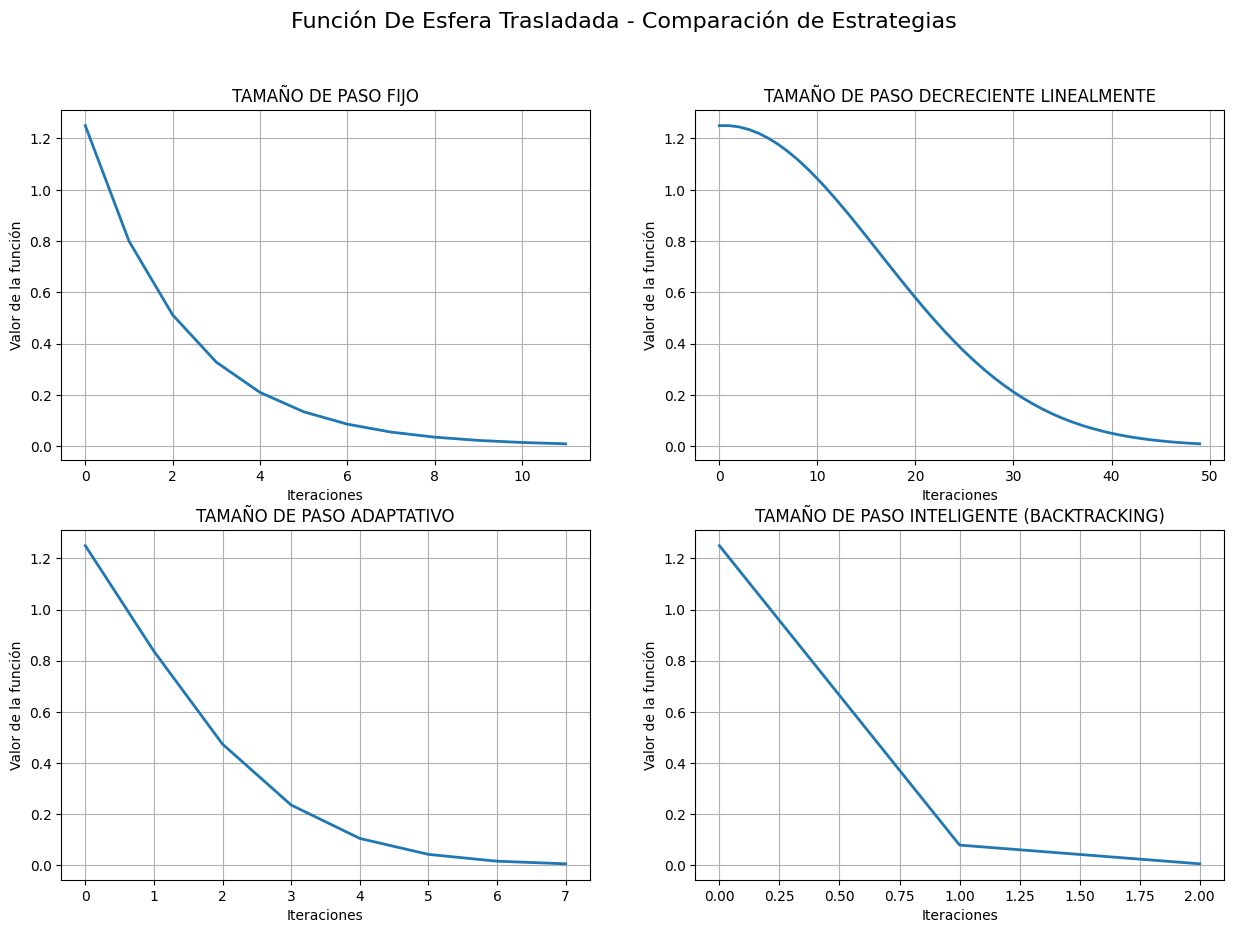

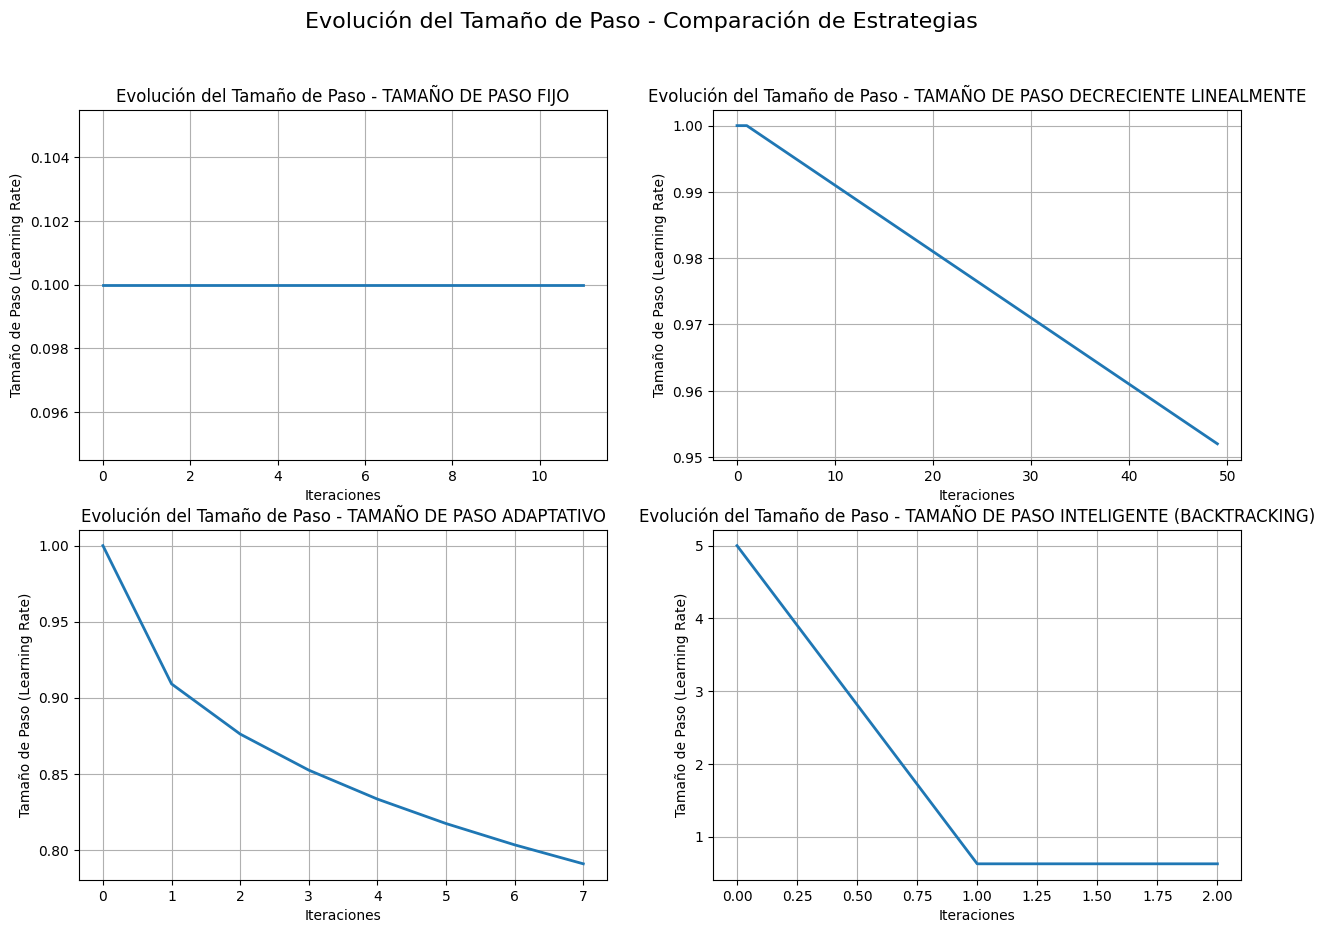

In [40]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN ESFERA TRASLADADA =======")

lr_strategies = {
    'fixed': 0.1, 
    'linear_decreasing': 1, 
    'adaptive': 1, 
    'intelligent': 5
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_sphere, trayectory_sphere, lr_history_sphere = sd_algorithm.optimize(
        func=translated_sphere,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=1000,
        stop_value=1e-2,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_sphere)
    lr_histories.append(lr_history_sphere)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_sphere)
    print("Valor de la función en el óptimo:", translated_sphere(x_sphere))
    print("Número de iteraciones:", len(trayectory_sphere))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función De Esfera Trasladada - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)
plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

======= OPTIMIZACIÓN DE LA FUNCIÓN DE ROSENBROCK =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.96540522 0.93190533 0.86818219 0.75313827 0.56580043]
Valor de la función en el óptimo: 0.0843953967473511
Número de iteraciones: 1000
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [0.94309258 0.8893002  0.79051968 0.62409813 0.38725818]
Valor de la función en el óptimo: 0.201259543292264
Número de iteraciones: 1000
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [0.93085824 0.86638196 0.75029242 0.56208216 0.31333059]
Valor de la función en el óptimo: 0.2775245484202695
Número de iteraciones: 1000
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.98163202 0.9637258  0.92834617 0.8616938  0.74166391]
Valor de la función en el óptimo: 0.02600977389485091
Número de iteraciones: 1000
Gráfica Descenso de la función:


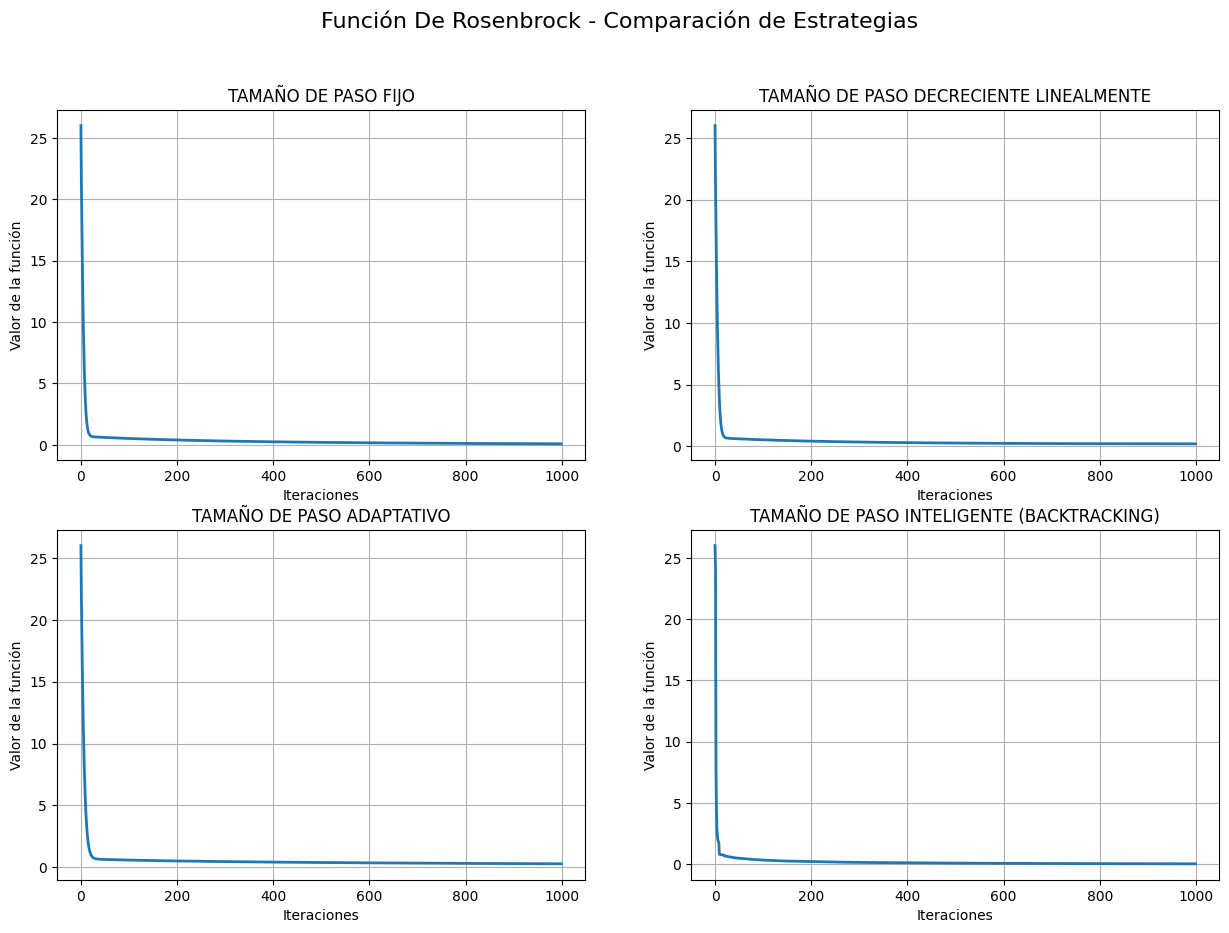

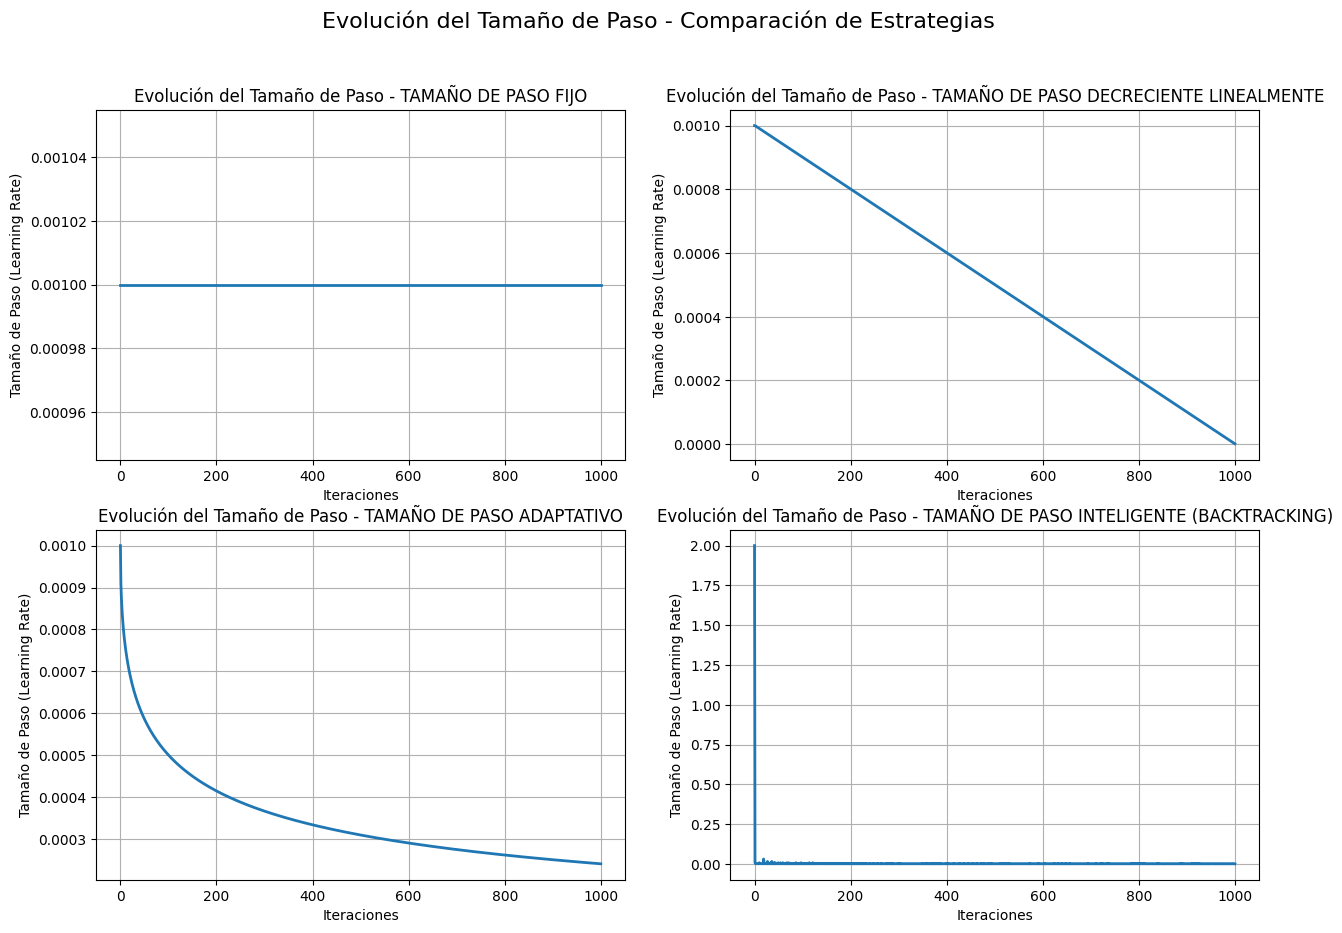

In [41]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN DE ROSENBROCK =======")

lr_strategies = {
    'fixed': 0.001, 
    'linear_decreasing': 0.001, 
    'adaptive': 0.001, 
    'intelligent': 2
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_rosenbrock, trayectory_rosenbrock, lr_history_rosenbrock = sd_algorithm.optimize(
        func=rosenbrock,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=1000,
        stop_value=1e-2,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_rosenbrock)
    lr_histories.append(lr_history_rosenbrock)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_rosenbrock)
    print("Valor de la función en el óptimo:", rosenbrock(x_rosenbrock))
    print("Número de iteraciones:", len(trayectory_rosenbrock))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función De Rosenbrock - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)

plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

======= OPTIMIZACIÓN DE LA FUNCIÓN DE PERM =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.37373353 0.92394664 0.28423641 0.23925204 0.23396527]
Valor de la función en el óptimo: 0.009998061571719667
Número de iteraciones: 935
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [0.41912372 0.920885   0.31263707 0.22632556 0.20960849]
Valor de la función en el óptimo: 0.018961822601823032
Número de iteraciones: 1000
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [0.44660679 0.91758339 0.33863209 0.21764715 0.18936633]
Valor de la función en el óptimo: 0.03200556450289099
Número de iteraciones: 1000
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.98437538 0.58679837 0.24590391 0.23101463 0.23072681]
Valor de la función en el óptimo: 0.009795331304480891
Número de iteraciones: 149
Gráfica Descenso de la función:


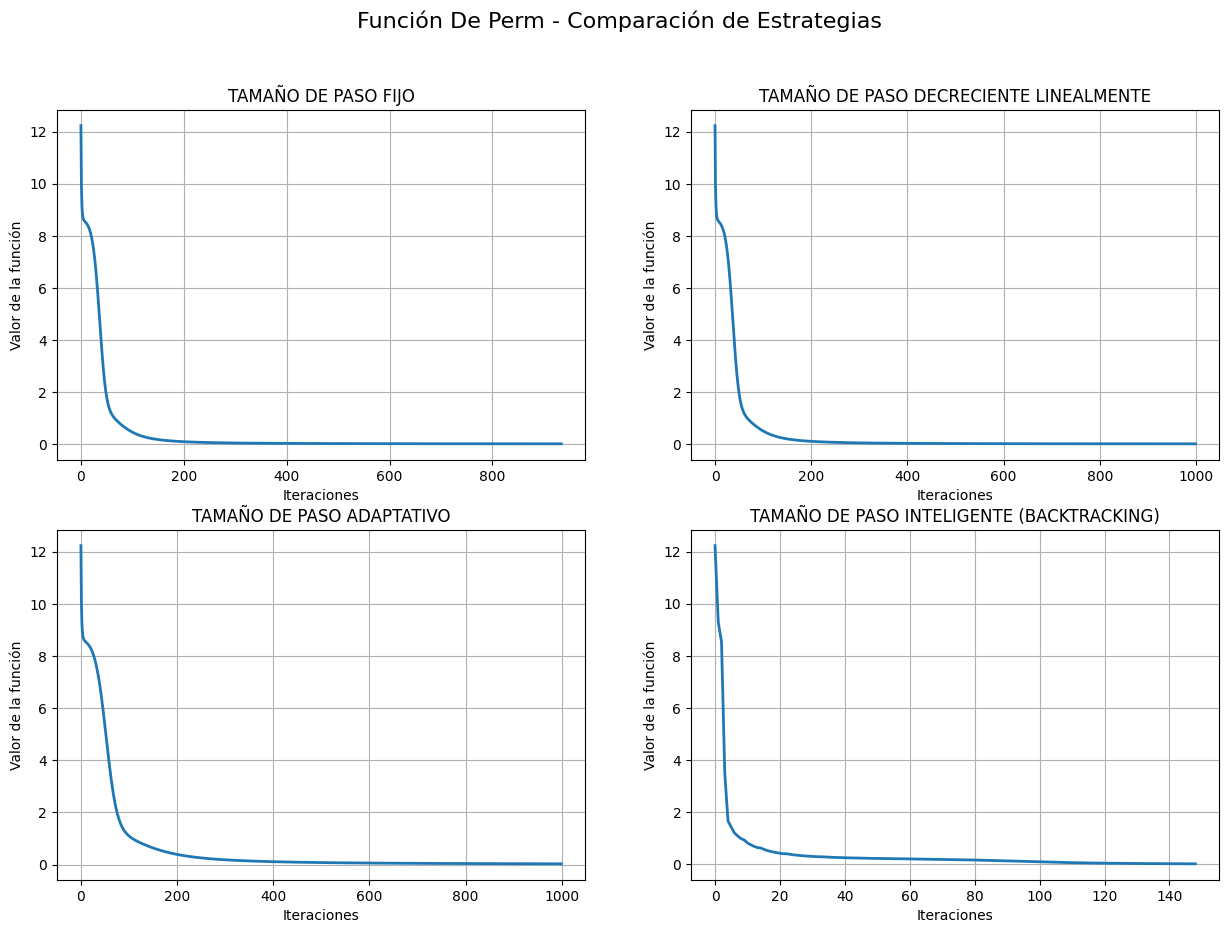

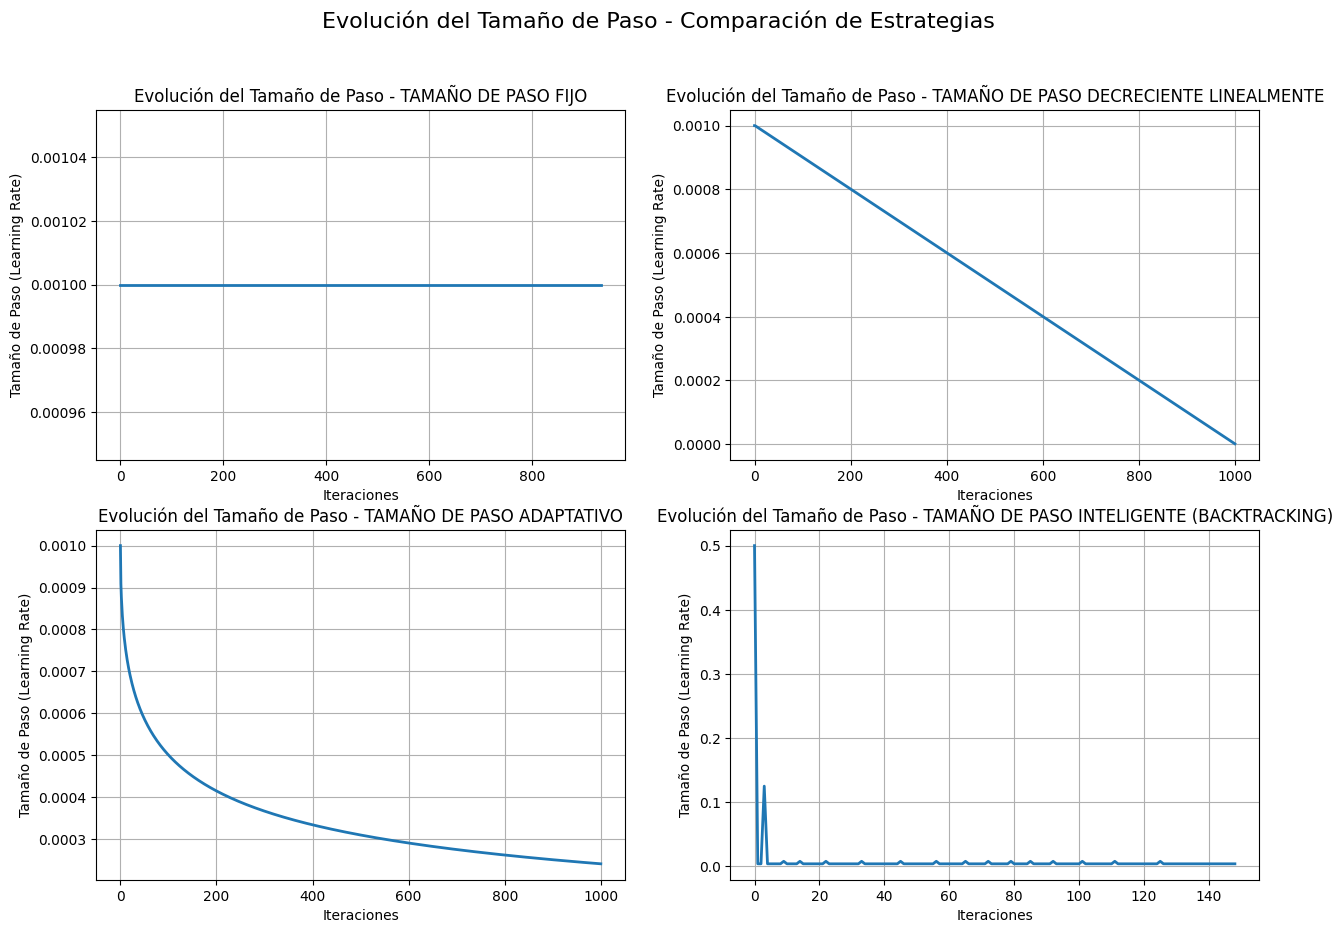

In [42]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN DE PERM =======")

lr_strategies = {
    'fixed': 0.001, 
    'linear_decreasing': 0.001, 
    'adaptive': 0.001, 
    'intelligent': 0.5
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_perm, trayectory_perm, lr_history_perm = sd_algorithm.optimize(
        func=perm,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=1000,
        stop_value=1e-2,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_perm)
    lr_histories.append(lr_history_perm)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_perm)
    print("Valor de la función en el óptimo:", perm(x_perm))
    print("Número de iteraciones:", len(trayectory_perm))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función De Perm - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)

plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

# Problema 9

Considere la siguiente función

\begin{align}
    f(x_1, x_2) = 10^{9}x_1^{2} + x_2^{2}. \tag{4}
\end{align}

Considere $\mathbf{x}_0 = (1.5, 1.5)$ como punto inicial. Resuelva el problema de minimización usando su script de $SD$. ¿Cuántas iteraciones necesita su implementación de $SD$ para alcanzar un valor de la función menor que $1e^{-4}$? A continuación, escale las variables de (4). ¿Cuántas iteraciones necesita su implementación de $SD$ para alcanzar un valor menor que $1e^{-4}$ en esta versión escalada de (4)?

## Métodos

In [52]:
import numpy as np                  # Para operaciones vectoriales y matriciales
import matplotlib.pyplot as plt     # Para visualización de datos
from typing import Callable         # Para anotaciones de tipos
import math                         # Para funciones matemáticas avanzadas

In [53]:
class SteepestDescentNumericalLr:
    '''
    Algoritmo de Descenso Más Pronunciado (Steepest Descent) con gradiente numérico 
    y estrategias de tasa de aprendizaje.
    '''
    def __init__(self): ...
    
    def optimize(self, 
                 func: Callable,  
                 x0: np.ndarray, 
                 lr: float = 0.01,
                 h: float = 1e-5,
                 max_iterations: int = 1000,
                 stop_value: float = None,
                 lr_schedule_type: str = 'fixed'):
        '''Optimiza una función utilizando el algoritmo de descenso más pronunciado 
        con diferentes estrategias de tasa de aprendizaje.

        Args:
            func: Función objetivo a minimizar.
            x0: Punto inicial (array).
            lr: Tamaño de paso inicial (opcional).
            h: Paso para la aproximación numérica del gradiente (opcional).
            max_iterations: Número máximo de iteraciones (opcional).
            stop_value: Valor de parada (opcional).
            lr_schedule_type: Tipo de estrategia de tasa de aprendizaje 
                                ('fixed', 'linear_decreasing', 'adaptive', 'intelligent').

        Returns:
            x: Punto óptimo encontrado.
            trayectory: Lista con los valores de la función en cada iteración.
            lr_history: Lista con la tasa de aprendizaje en cada iteración.
        '''
        x = np.array(x0, dtype=float)
        trayectory = []
        lr_history = []
        initial_lr = lr
        lr_history.append(initial_lr)
        
        for i in range(max_iterations):
            f_val = func(x)
            trayectory.append(f_val)

            if stop_value and f_val <= stop_value:
                    break

            grad = self.numerical_gradient(func, x, h=h)

            lr = self.get_learning_rate(
                schedule_type=lr_schedule_type,
                initial_lr=initial_lr,
                iteration=i,
                max_iterations=max_iterations,
                func=func,
                x=x,
                grad=grad
            )
            lr_history.append(lr)

            x = x - lr * grad

        return x, trayectory, lr_history

    def numerical_gradient(self, f, x, h):
        '''
        Calcula el gradiente de f en x usando diferencias finitas centrales.

        Args:
            f: Función objetivo.
            x: Punto en el que se calcula el gradiente.
            h: Paso para la aproximación numérica del gradiente.

        Returns:
            grad: Gradiente aproximado en el punto x.
        '''
        n = len(x)
        grad = np.zeros(n)
        
        for i in range(n):
            x_plus = x.copy()
            x_minus = x.copy()
            
            x_plus[i] += h
            x_minus[i] -= h

            grad[i] = (f(x_plus) - f(x_minus)) / (2*h)

        return grad
    
    def get_learning_rate(self, schedule_type, initial_lr, iteration, max_iterations, func, x, grad):
        '''
        Obtiene la tasa de aprendizaje según la estrategia especificada.

        Args:
            schedule_type: Tipo de estrategia de tasa de aprendizaje.
            initial_lr: Tasa de aprendizaje inicial.
            iteration: Iteración actual.
            max_iterations: Número máximo de iteraciones.
            func: Función objetivo.
            x: Punto actual.
            grad: Gradiente en el punto actual.

        Returns:
            lr: Tasa de aprendizaje ajustada.
        '''
        if schedule_type == 'fixed':
            return initial_lr
        elif schedule_type == 'linear_decreasing':
            return self.linear_decreasing_lr(initial_lr, iteration, max_iterations)
        elif schedule_type == 'adaptive':
            return self.adaptive_lr(initial_lr, iteration)
        elif schedule_type == 'intelligent':
            return self.intelligent_lr(func, x, grad, initial_lr)
        else:
            raise ValueError(f"Estrategia de lr desconocida: {schedule_type}")

    # Decreciente lineal
    def linear_decreasing_lr(self, initial_lr, iteration, max_iterations):
        return initial_lr * (1 - iteration / max_iterations)
    
    # Decreciente adaptativa
    def adaptive_lr(self, initial_lr, iteration):
        return initial_lr / (1 + 0.1 * np.sqrt(iteration + 1))

    # Decreciente inteligente (backtracking con condicion de armijo)
    def intelligent_lr(self, func, x, grad, initial_lr):
        alpha = initial_lr
        c1 = 1e-4
        rho = 0.5
        max_backtracks = 50
        min_alpha = 1e-10
        
        f_x = func(x)
        grad_norm_sq = np.dot(grad, grad)
        
        if grad_norm_sq < 1e-12:
            return min_alpha
        
        directional_derivative = -grad_norm_sq
        backtrack_count = 0
        
        while backtrack_count < max_backtracks and alpha > min_alpha:
            x_new = x - alpha * grad
            f_new = func(x_new)

            if f_new <= f_x + c1 * alpha * directional_derivative:
                break
                
            alpha *= rho
            backtrack_count += 1
        
        return max(alpha, min_alpha)
    
    def plot(self, trayectory, title="Descenso Más Pronunciado"):
        ''' 
        Plotea la trayectoria de la función a lo largo de las iteraciones.

        Args:
            trayectory: Lista con los valores de la función en cada iteración.
            title: Título del gráfico (opcional).
            
        Returns:
            None, muestra el gráfico.
        '''
        plt.figure(figsize=(8, 6))
        plt.plot(trayectory)
        plt.title(title)
        plt.xlabel('Iteraciones')
        plt.ylabel('Valor de la función')
        plt.grid(True)
        plt.show()

In [54]:
def function4(x):
    """10⁹x_1²+x_2²"""
    return 1e9 * x[0]**2 + x[1]**2

# MÉTODO 1: ESCALAR LAS VARIABLES f(Cx, Cy)
# Para equilibrar los coeficientes, necesitamos que ambos sean similares
# Si queremos que ambos coeficientes sean 1, necesitamos:
# C₁² * 10⁹ = 1  =>  C₁ = 1/√(10⁹) = 1/31622.77
# C₂² * 1 = 1     =>  C₂ = 1

def function4_normalized(x):
    C1 = 1.0 / math.sqrt(1e9)
    C2 = 1.0
    x1_scaled = C1 * x[0]
    x2_scaled = C2 * x[1]
    
    return 1e9 * x1_scaled**2 + x2_scaled**2

## Resultados

In [ ]:
# Valores iniciales
# x0 = [1.5, 1.5]
x0 = [1.5, 1.5]

# Inicializar el algoritmo
sd_algorithm = SteepestDescentNumericalLr()

======= OPTIMIZACIÓN DE LA FUNCIÓN (4) =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [3.05555396e-10 1.49999997e+00]
Valor de la función en el óptimo: 2.2499999100891914
Número de iteraciones: 100
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [2.89851245e-05 1.49999998e+00]
Valor de la función en el óptimo: 3.0901373957286733
Número de iteraciones: 100
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [3.17101631e-06 1.49999998e+00]
Valor de la función en el óptimo: 2.260055289390352
Número de iteraciones: 100
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [4.23651208e-09 1.49999968e+00]
Valor de la función en el óptimo: 2.2499990724522356
Número de iteraciones: 100
Gráfica Descenso de la función:


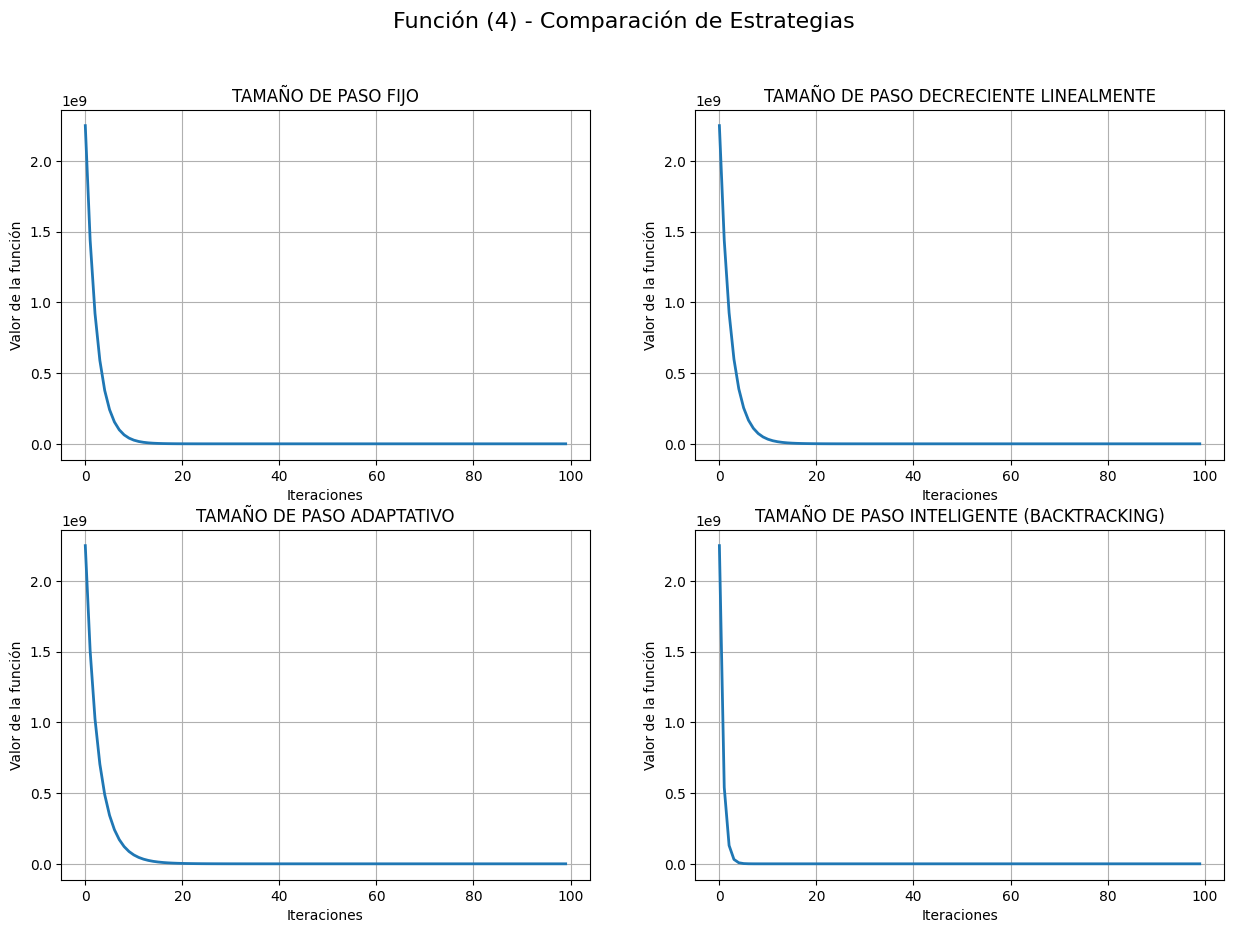

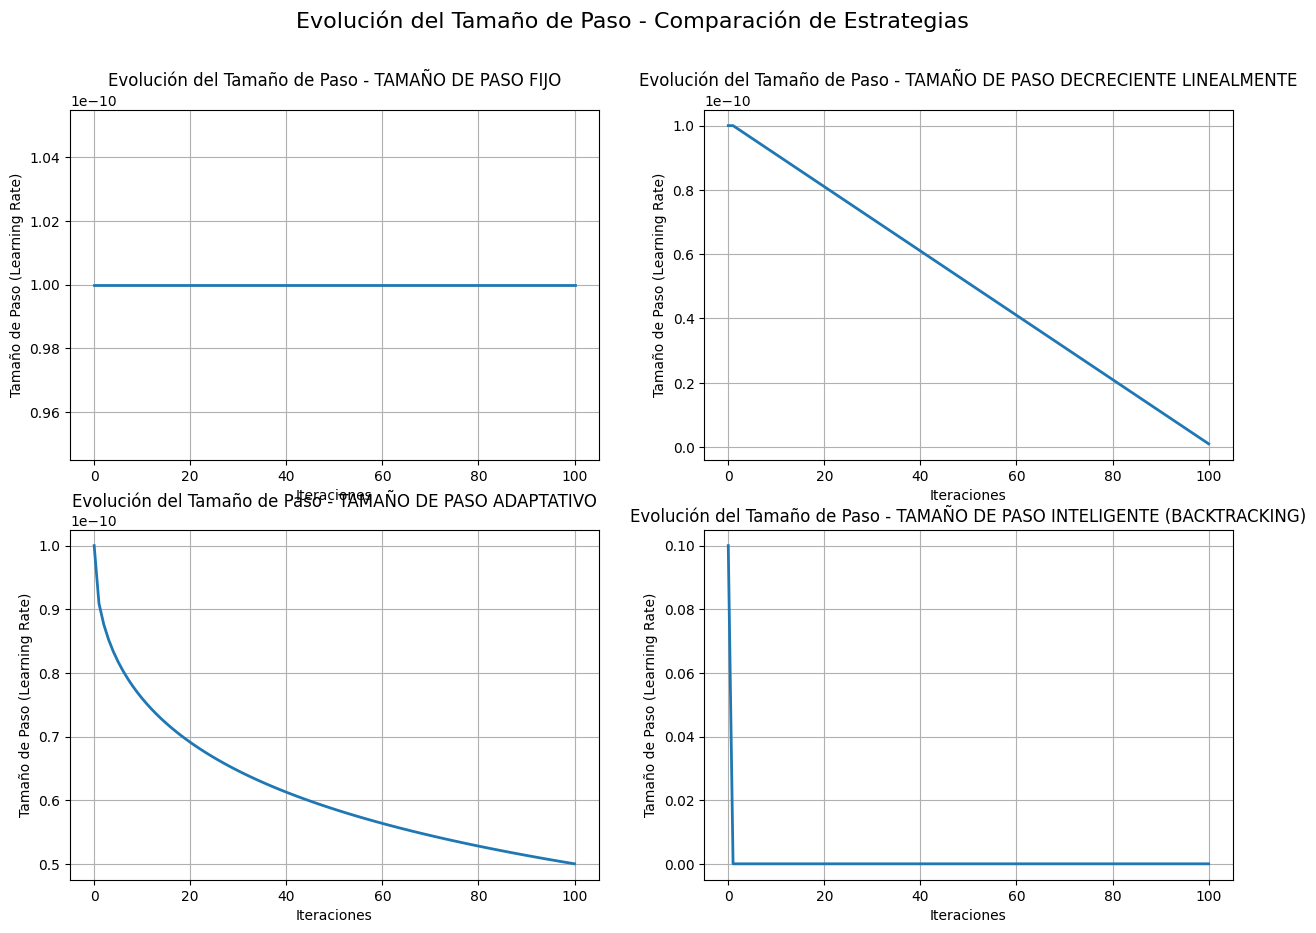

In [56]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN (4) =======")

lr_strategies = {
    'fixed': 1e-10, 
    'linear_decreasing': 1e-10, 
    'adaptive': 1e-10, 
    'intelligent': 1e-1
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_sphere, trayectory_sphere, lr_history_sphere = sd_algorithm.optimize(
        func=function4,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=100,
        stop_value=1e-4,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_sphere)
    lr_histories.append(lr_history_sphere)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_sphere)
    print("Valor de la función en el óptimo:", function4(x_sphere))
    print("Número de iteraciones:", len(trayectory_sphere))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función (4) - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)
plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()

======= OPTIMIZACIÓN DE LA FUNCIÓN (4) NORMALIZADA =======
TAMAÑO DE PASO FIJO
Valor óptimo encontrado: [0.00566684 0.00566684]
Valor de la función en el óptimo: 6.4226146171508e-05
Número de iteraciones: 26
TAMAÑO DE PASO DECRECIENTE LINEALMENTE
Valor óptimo encontrado: [0.00625746 0.00625746]
Valor de la función en el óptimo: 7.831165652926425e-05
Número de iteraciones: 30
TAMAÑO DE PASO ADAPTATIVO
Valor óptimo encontrado: [0.00249433 0.00249433]
Valor de la función en el óptimo: 1.2443384915832409e-05
Número de iteraciones: 4
TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)
Valor óptimo encontrado: [0.00585938 0.00585937]
Valor de la función en el óptimo: 6.866455078688986e-05
Número de iteraciones: 5
Gráfica Descenso de la función:


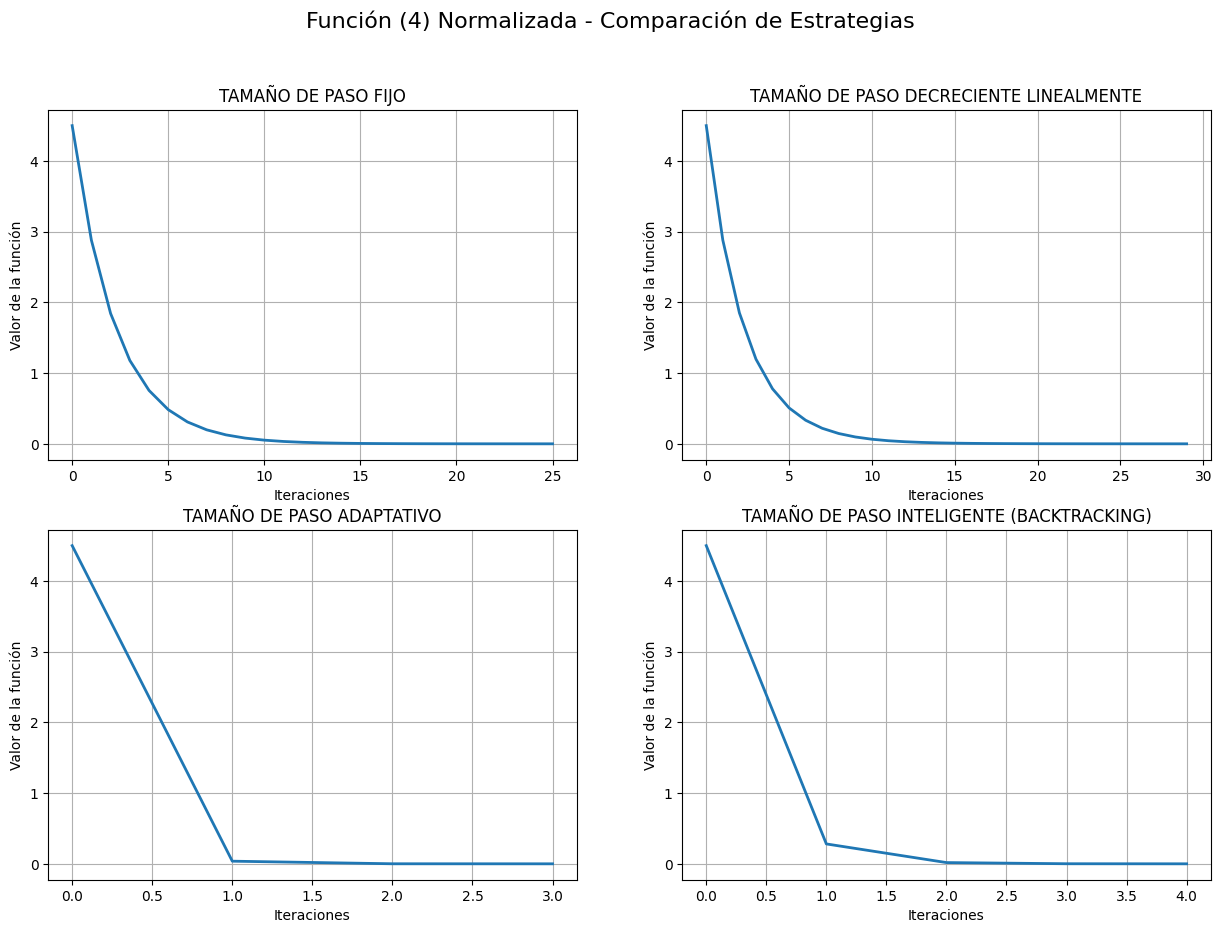

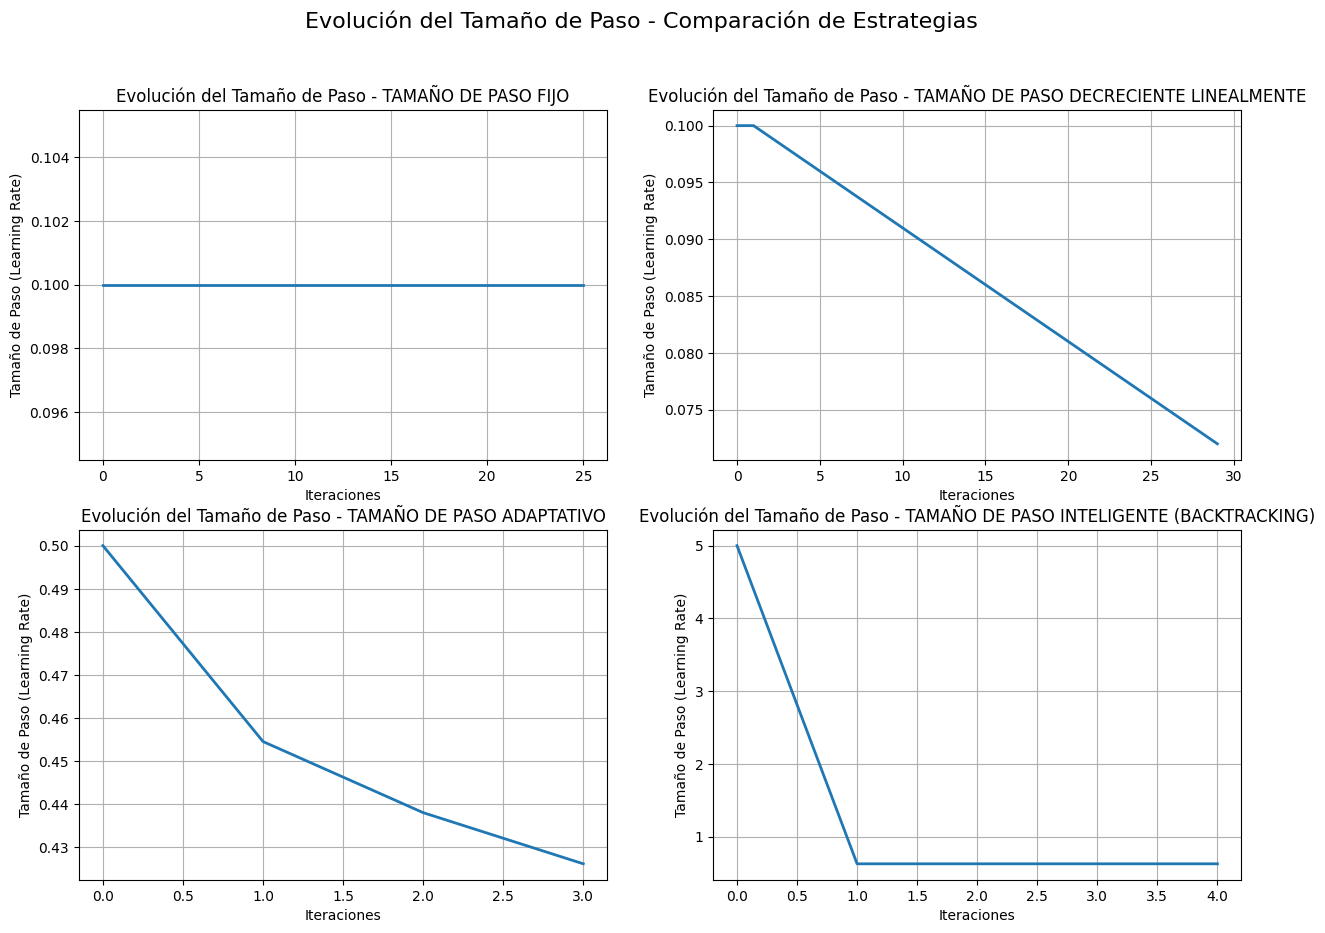

In [57]:
print("======= OPTIMIZACIÓN DE LA FUNCIÓN (4) NORMALIZADA =======")

lr_strategies = {
    'fixed': 0.1, 
    'linear_decreasing': 0.1, 
    'adaptive': 0.5, 
    'intelligent': 5
}
lr_names = ["TAMAÑO DE PASO FIJO", 
            "TAMAÑO DE PASO DECRECIENTE LINEALMENTE",
            "TAMAÑO DE PASO ADAPTATIVO", 
            "TAMAÑO DE PASO INTELIGENTE (BACKTRACKING)"]

trayectories = []
lr_histories = []

for schedule, lr, name in zip(lr_strategies.keys(), lr_strategies.values(), lr_names):
    x_sphere, trayectory_sphere, lr_history_sphere = sd_algorithm.optimize(
        func=function4_normalized,
        x0=x0,
        lr=lr,
        h=1e-5,
        max_iterations=100,
        stop_value=1e-4,
        lr_schedule_type=schedule
    )
    trayectories.append(trayectory_sphere)
    lr_histories.append(lr_history_sphere)
    print("="*60)
    print(name)
    print("="*60)
    print("Valor óptimo encontrado:", x_sphere)
    print("Valor de la función en el óptimo:", function4_normalized(x_sphere))
    print("Número de iteraciones:", len(trayectory_sphere))

print("="*60)
print("Gráfica Descenso de la función:")
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for ax, history, name in zip(axs.flatten(), trayectories, lr_names):
    ax.plot(history, linewidth=2)
    ax.set_title(name)
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Valor de la función')
    ax.grid(True)

plt.suptitle('Función (4) Normalizada - Comparación de Estrategias', fontsize=16)
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for ax, lr_history, name in zip(axs.flatten(), lr_histories, lr_names):
    ax.plot(lr_history, linewidth=2)
    ax.set_title(f"Evolución del Tamaño de Paso - {name}")
    ax.set_xlabel('Iteraciones')
    ax.set_ylabel('Tamaño de Paso (Learning Rate)')
    ax.grid(True)
plt.suptitle('Evolución del Tamaño de Paso - Comparación de Estrategias', fontsize=16)
plt.show()